In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# References 

http://www.cs.waikato.ac.nz/~ihw/papers/94-HWT-SI-IHW-SIRDS-paper.pdf

# Figure 1: checkerboard 

In [116]:
def make_checkerboard(horizontal_pattern=20, vertical_pattern=20, repetitions=(10, 10)):
    """Makes a checkerboard autostereogram.
    Repetitions = (reps_horizontal, reps_vertical)
    """
    checkerboard = np.zeros((horizontal_pattern * repetitions[0], vertical_pattern * repetitions[1]))
    for i in range(checkerboard.shape[0]):
        if (i // vertical_pattern) % 2 == 0: 
            checkerboard[i, :] = make_line(horizontal_pattern, repetitions[0])
        else:
            checkerboard[i, :] = make_line(horizontal_pattern, repetitions[0], with_dot=False)
    return checkerboard

In [117]:
def make_line(pattern_size, repetitions, with_dot=True):
    """Makes a horizontal line."""
    pattern = np.random.binomial(1, p=0.5, size=pattern_size)
    line = np.concatenate([pattern for _ in range(repetitions)]) 
    if with_dot:
        for j in range(repetitions-1):
            line[(j+1) * pattern_size] = np.random.binomial(1, p=0.5, size=1)
    return line

In [118]:
pattern_size = 90
repetitions = 3

In [119]:
line = make_line(pattern_size, repetitions, with_dot=False)

In [120]:
line.shape

(270,)

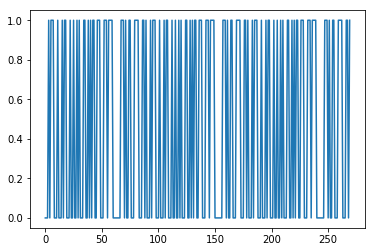

In [121]:
plt.plot(line)

In [122]:
checkerboard = make_checkerboard()

(-0.5, 199.5, 199.5, -0.5)

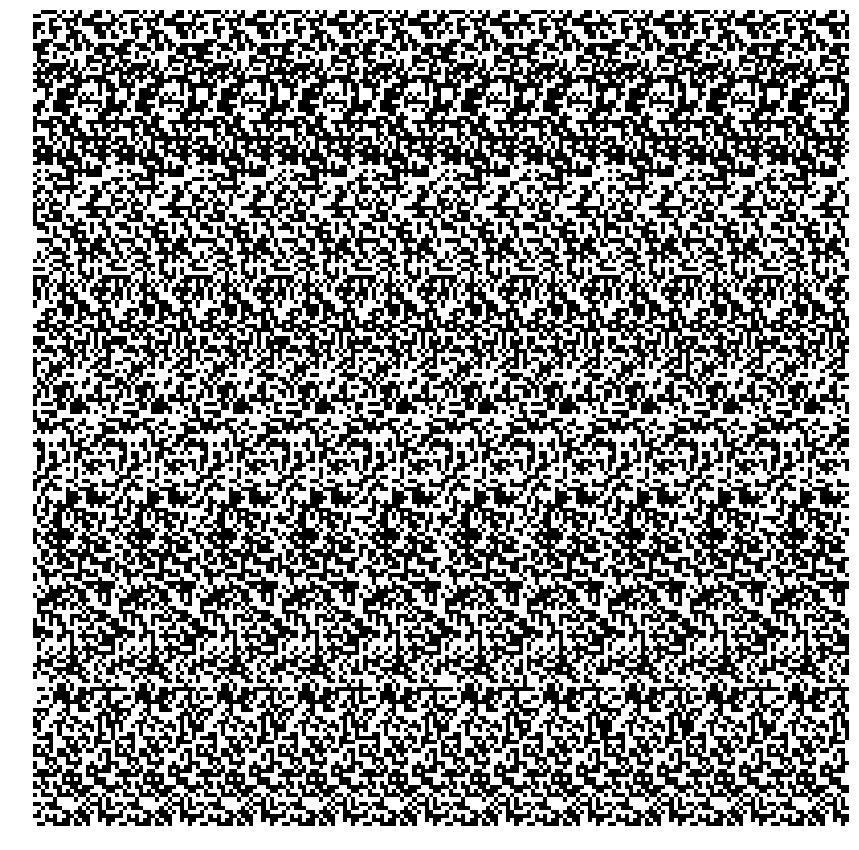

In [123]:
plt.figure(figsize=(15, 15))
plt.imshow(checkerboard, cmap='gray')
plt.axis('off')

# Second try 

In [87]:
def make_alternating_line():
    "Makes an alternating line."
    pattern = np.random.binomial(1, p=0.5, size=20)
    line = np.empty([])
    for block in range(10):
        if block % 2 == 0: 
            line = np.append(line, pattern)
        else:
            line = np.append(line, np.r_[pattern, np.random.randint(2)])
    return line

In [88]:
line = make_alternating_line()

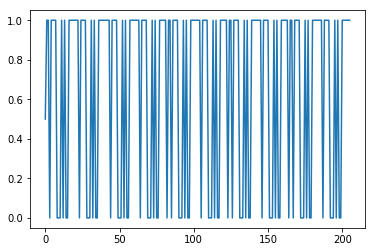

In [89]:
plt.plot(line)

In [90]:
line.shape

(206,)

In [91]:
line_shape = line.size

In [92]:
checkerboard = np.c_[[make_alternating_line() for _ in range(206)]]

(-0.5, 205.5, 205.5, -0.5)

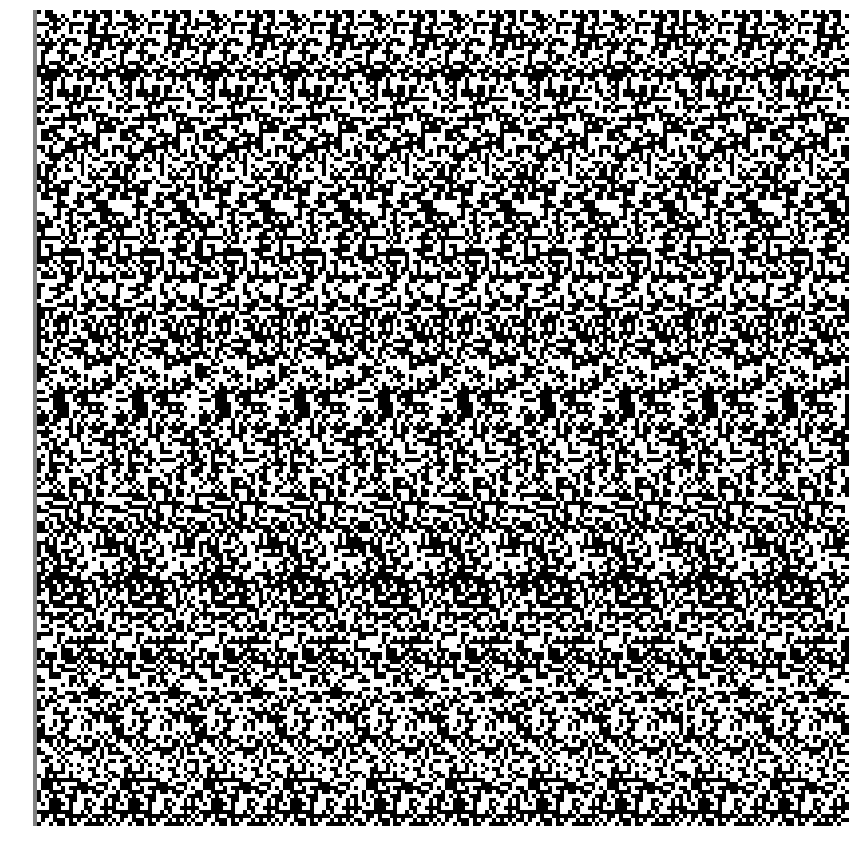

In [93]:
plt.figure(figsize=(15, 15))
plt.imshow(checkerboard, cmap='gray')
plt.axis('off')

# Third try 

In [110]:
def make_line():
    pattern = np.random.binomial(1, p=0.5, size=40)
    depth_map = (np.arange(200) / 20).astype(np.int) % 2
    line = np.empty(depth_map.size)
    for j in range(depth_map.size):
        if j < pattern.size:
            line[j] = pattern[j]
        else:
            lag = 80 + depth_map[j] * 20
            line[j] = line[j - lag]
    return line

In [111]:
checkerboard = np.c_[[make_line() for _ in range(200)]]

(-0.5, 199.5, 199.5, -0.5)

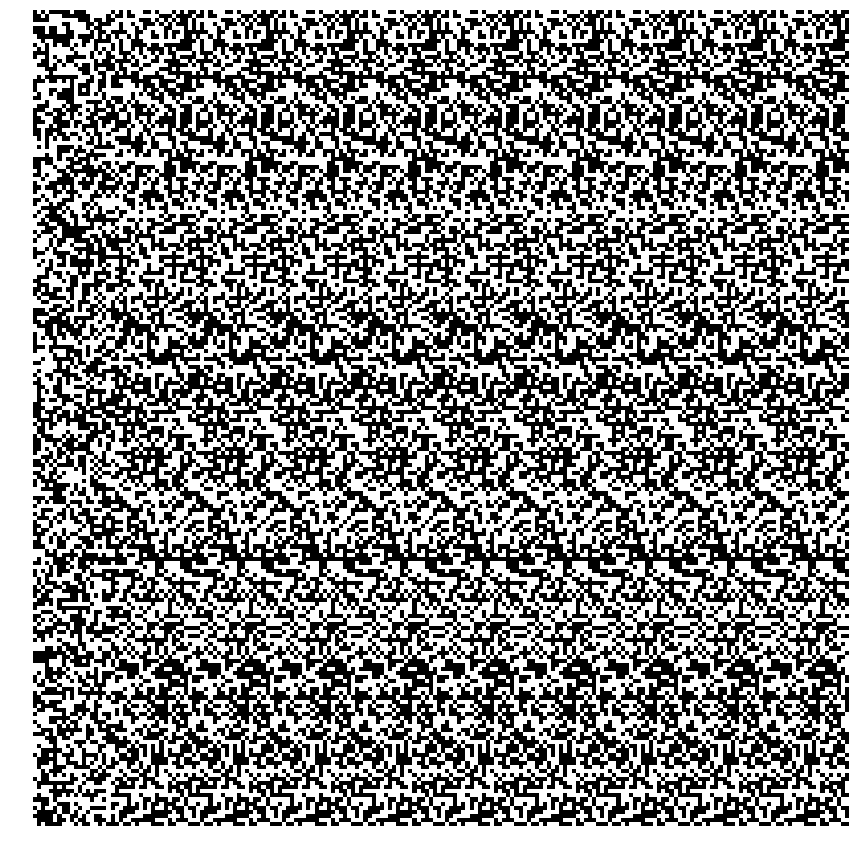

In [112]:
plt.figure(figsize=(15, 15))
plt.imshow(checkerboard, cmap='gray')
plt.axis('off')

# Fourth try 

The initial pattern needs to be large!

Let's just make a far plane background image.

In [125]:
pattern_size = 90

In [164]:
img_shape = (200, 200)

In [165]:
def make_pattern(pattern_size):
    "Returns random dot pattern."
    return np.random.binomial(1, 0.5, size=pattern_size)

In [166]:
lag = 72
far_plane = np.empty(img_shape)
for row in range(img_shape[0]):
    pattern = make_pattern(pattern_size)
    line = np.empty((img_shape[1]))
    for c in np.arange(line.size):
        if c < pattern_size:
            line[c] = pattern[c]
        else:
            line[c] = line[c - lag]
    far_plane[row, :] = line

(-0.5, 199.5, 199.5, -0.5)

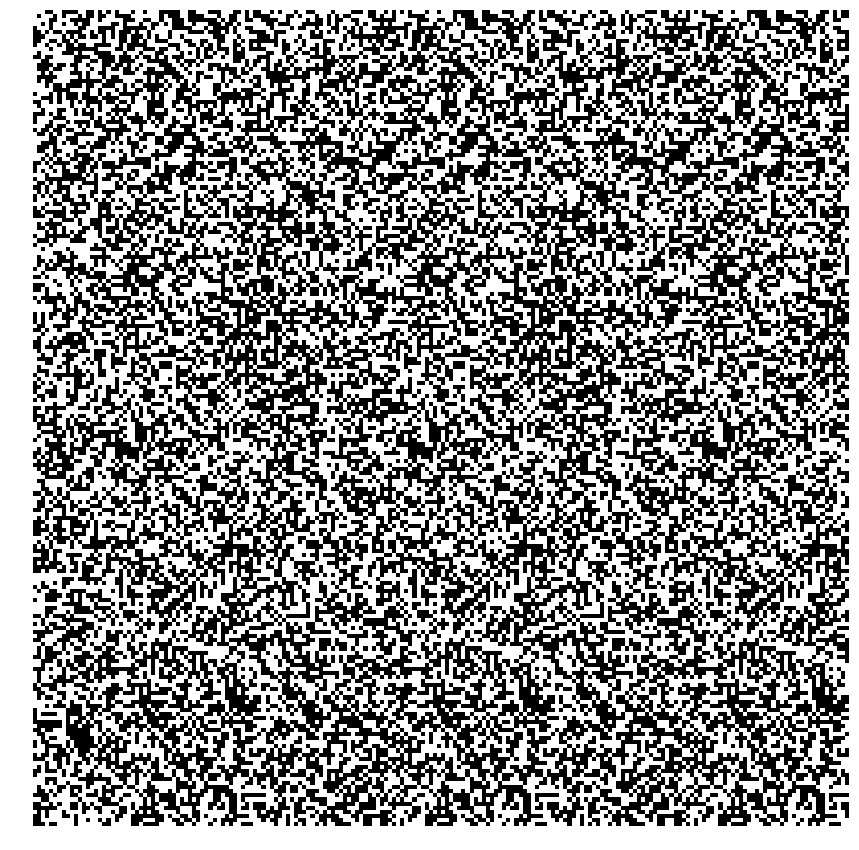

In [167]:
plt.figure(figsize=(15, 15))
plt.imshow(far_plane, cmap='gray')
plt.axis('off')

Ok, this works. Let's now try the checkerboard.

In [178]:
far_lag = 80
near_lag = 70
n_squares = 6
dist = img_shape[0] // 10

checkerboard = np.empty(img_shape)
for row in range(img_shape[0]):
    pattern = make_pattern(pattern_size)
    line = np.empty((img_shape[1]))
    for c in np.arange(line.size):
            if c // dist % 2 == row // dist % 2:
                lag = far_lag
            else:
                lag = near_lag
            if c - lag < 0:
                line[c] = pattern[(c - lag) % pattern_size]
            else:
                line[c] = line[c - lag]
    checkerboard[row, :] = line

(-0.5, 199.5, 199.5, -0.5)

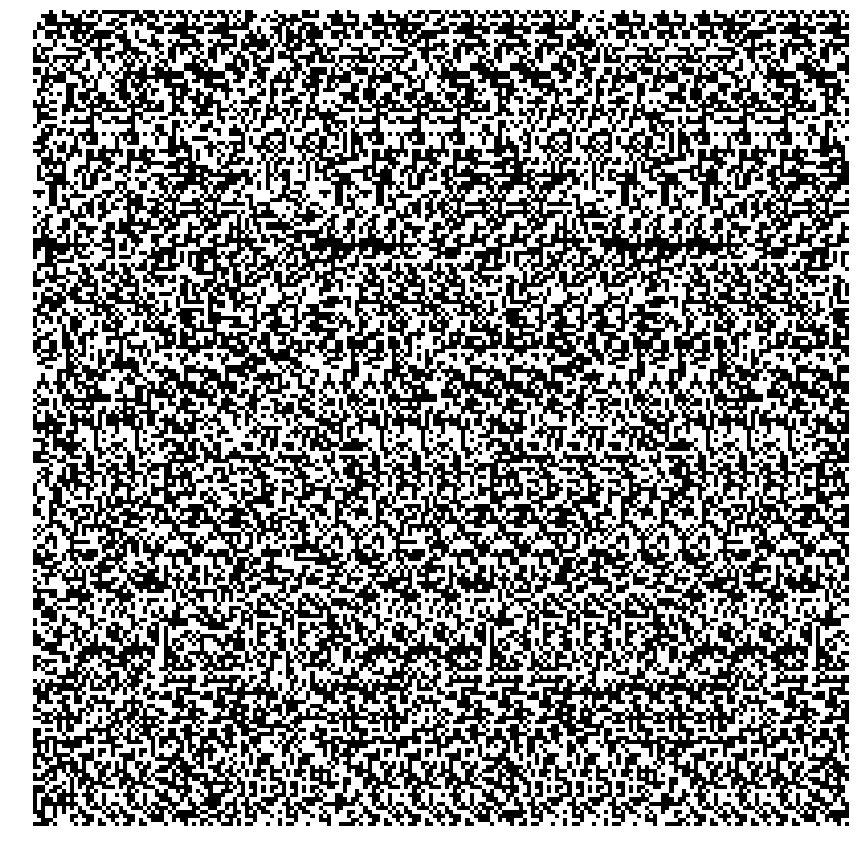

In [179]:
plt.figure(figsize=(15, 15))
plt.imshow(checkerboard, cmap='gray')
plt.axis('off')